In [1]:
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

In [2]:
# 获取红酒数据
wine = load_wine()
# print(wine)

# 划分训练集与测试集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target)

# 创建决策树

In [10]:
# 创建决策树实例对象
clf = tree.DecisionTreeClassifier(
    criterion="entropy", # 使用信息熵计算不纯度
    random_state=0, # 随机种子
    splitter='random', # 控制决策树中的随机选项,默认是best
)

# 使用fit方法训练模型
clf.fit(x_train, y_train)


# 使用测试集验证模型准确率
print(clf.score(x_test, y_test))

0.9333333333333333


In [12]:
# 指定特征名称,准备画一个决策树
feature_name = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜色强度', '色调', 'od280/od315稀释葡萄酒', '脯氨酸']
for i in [*zip(feature_name,clf.feature_importances_)]:
    print(i)

('酒精', 0.07680839021875567)
('苹果酸', 0.01563805710656796)
('灰', 0.010132276844557838)
('灰的碱性', 0.030712984206419196)
('镁', 0.0)
('总酚', 0.009637913703758263)
('类黄酮', 0.38881165638969795)
('非黄烷类酚类', 0.0)
('花青素', 0.013275684004706835)
('颜色强度', 0.020054720504269298)
('色调', 0.21003373835340358)
('od280/od315稀释葡萄酒', 0.021513719389508194)
('脯氨酸', 0.20338085927835525)


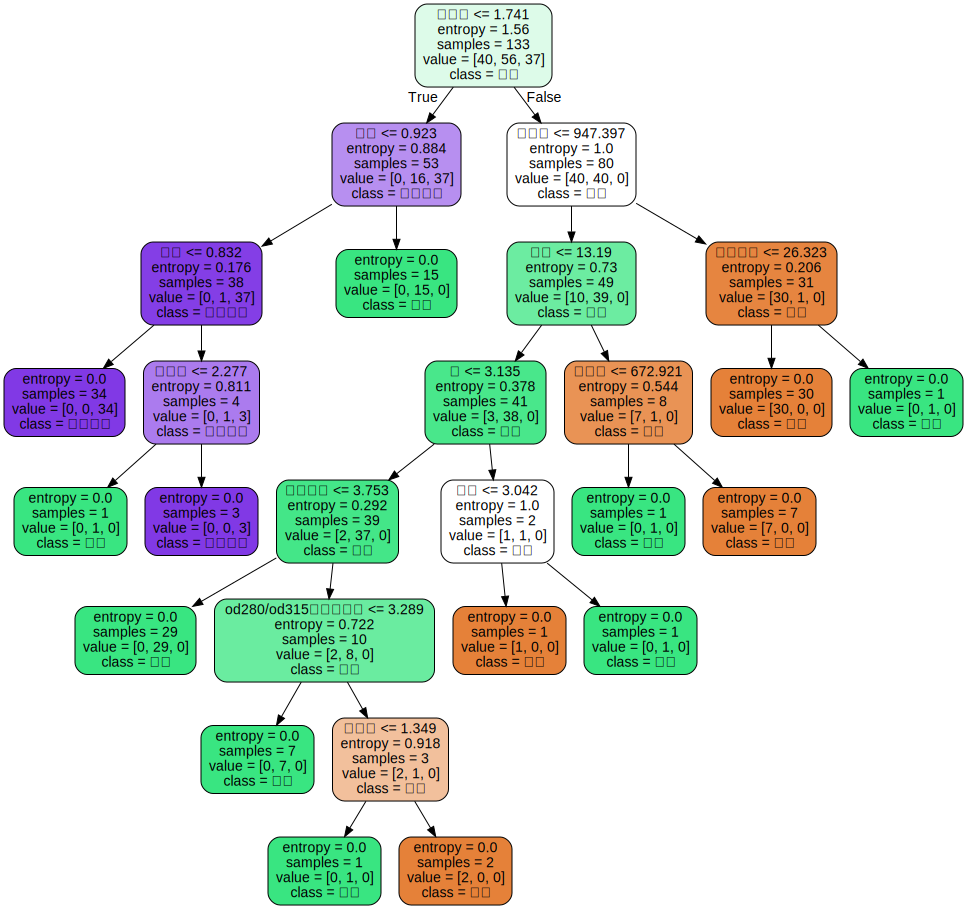

In [14]:
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_name, # 指定对应特征名称
    class_names=["琴酒", "雪莉", "贝尔摩德"], # 指定对应酒的名字
    filled=True,
    rounded=True,
)

graph = graphviz.Source(dot_data)
graph

# 决策树优化

- 决策树的剪枝操作

In [34]:
clf = tree.DecisionTreeClassifier(
    criterion="entropy", # 使用信息熵计算不纯度
    random_state=30, # 随机种子
#     splitter='random', # 控制决策树中的随机选项,默认是best
    max_depth=3, # 树最大的生长层数
)
# 使用fit方法训练模型
clf.fit(x_train, y_train)


# 使用测试集验证模型准确率
print(clf.score(x_test, y_test))

0.9111111111111111


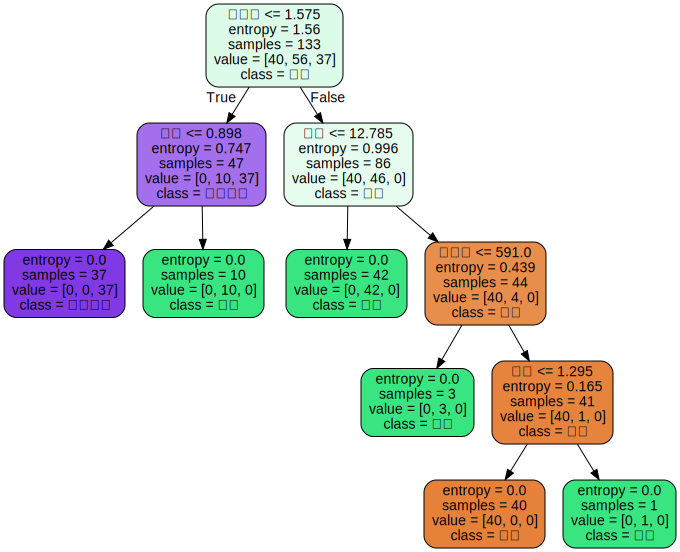

In [29]:
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_name, # 指定对应特征名称
    class_names=["琴酒", "雪莉", "贝尔摩德"], # 指定对应酒的名字
    filled=True,
    rounded=True,
)

graph = graphviz.Source(dot_data)
graph

# 使用画图的方式确定最优参数值

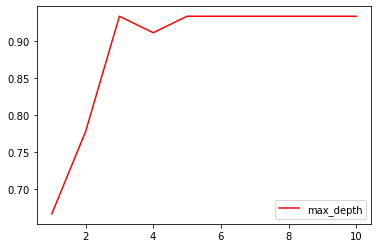

In [33]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()


In [35]:
clf.classes_

array([0, 1, 2])

In [37]:
clf.max_features_

13

In [38]:
clf.n_classes_

3

In [39]:
clf.n_features_

13

In [40]:
clf.n_outputs_

1

In [41]:
clf.tree_

In [43]:
clf.tree_.capacity

9

In [45]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(x_test)

array([2, 2, 8, 8, 8, 8, 3, 5, 2, 3, 3, 8, 8, 2, 8, 2, 7, 2, 7, 5, 8, 2,
       8, 5, 3, 8, 5, 3, 2, 2, 5, 2, 8, 8, 8, 5, 5, 8, 8, 8, 7, 8, 8, 8,
       8], dtype=int64)

In [46]:
#predict返回每个测试样本的分类/回归结果
clf.predict(x_test)

array([2, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2,
       0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0])

# 回归树

In [53]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [48]:
boston = load_boston()

In [51]:
# 实例化回归决策树
regressor = DecisionTreeRegressor(random_state=30)

In [54]:
# 较差验证评估树的预测结果
cross_val_score(
    regressor, # 传入回归决策树对象
    boston.data, # 需要传入所有的数据
    boston.target, # 需要传入所有的数据
    cv=10, # 进行10次交叉验证
    scoring="neg_mean_squared_error" # 使用均方误差评估模型
)

array([-14.37823529, -11.23686275, -18.29568627, -58.87098039,
       -16.47647059, -44.44843137, -12.8508    , -92.035     ,
       -62.193     , -18.1732    ])